<center><img src="trainers.jpg" alt="Trainers in a store" width=550></center>

Sports clothing and athleisure attire is a huge industry, worth approximately $193 billion in 2021 with a strong growth forecast over the next decade! (`Source: https://www.statista.com/statistics/254489/total-revenue-of-the-global-sports-apparel-market/`)

In this workbook, you will undertake the role of a product analyst for an online sports clothing company. The company is specifically interested in how it can improve revenue. You will dive into product data such as pricing, reviews, descriptions, and ratings, as well as revenue and website traffic, to produce recommendations for its marketing and sales teams.  

### The data:
You've been provided with four datasets to investigate:

`brands.csv`

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `brand` | Brand of the product | 

`finance.csv`

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `listing_price` | Original price of the product | 
| `sale_price` | Discounted price of the product |
| `discount` | Discount off the listing price, as a decimal | 
| `revenue` | Revenue generated by the product |

`info.csv`

| Columns | Description |
|---------|-------------|
| `product_name` | Name of the product | 
| `product_id` | Unique product identifier |
| `description` | Description of the product |

`reviews.csv`

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `rating` | Average product rating | 
| `reviews` | Number of reviews for the product |

### To complete the project, you will need to merge the datasets, drop null values, and answer the questions below.

#### 1. What is the volume of products and average revenue for Adidas and Nike products based on listing price quartiles?

#### 2. Label products priced up to quartile one as "Budget", quartile two as "Average", quartile three as "Expensive", and quartile four as "Elite".
#### Store as a pandas DataFrame called adidas_vs_nike containing columns: "brand", "price_label", "num_products", and "mean_revenue". All numeric values should be rounded to two decimal places.

#### 3. Do any differences exist between the word count of a product's description and its mean rating?

#### 4. Split product description length into bins of 100-character intervals and calculate the average rating and total number of reviews.
#### Store the results as a pandas DataFrame called description_lengths containing columns: "description_length", "mean_rating", "total_reviews". Again, round numeric values to two decimal places.

In [1339]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the data
brands = pd.read_csv("brands.csv") 
finance = pd.read_csv("finance.csv")
info = pd.read_csv("info.csv")
reviews = pd.read_csv("reviews.csv")

# Start coding here...

In [1340]:
print(brands.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  3179 non-null   object
 1   brand       3120 non-null   object
dtypes: object(2)
memory usage: 49.8+ KB
None


In [1341]:
print(finance.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     3179 non-null   object 
 1   listing_price  3120 non-null   float64
 2   sale_price     3120 non-null   float64
 3   discount       3120 non-null   float64
 4   revenue        3120 non-null   float64
dtypes: float64(4), object(1)
memory usage: 124.3+ KB
None


In [1342]:
print(info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  3120 non-null   object
 1   product_id    3179 non-null   object
 2   description   3117 non-null   object
dtypes: object(3)
memory usage: 74.6+ KB
None


In [1343]:
print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  3179 non-null   object 
 1   rating      3120 non-null   float64
 2   reviews     3120 non-null   float64
dtypes: float64(2), object(1)
memory usage: 74.6+ KB
None


In [1344]:
# Merge the data

merged = pd.merge(brands, finance, on='product_id')

merged = pd.merge(merged, info, on='product_id')

merged = pd.merge(merged, reviews, on='product_id')

merged.dropna(inplace = True)

print(merged.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3117 entries, 1 to 3178
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     3117 non-null   object 
 1   brand          3117 non-null   object 
 2   listing_price  3117 non-null   float64
 3   sale_price     3117 non-null   float64
 4   discount       3117 non-null   float64
 5   revenue        3117 non-null   float64
 6   product_name   3117 non-null   object 
 7   description    3117 non-null   object 
 8   rating         3117 non-null   float64
 9   reviews        3117 non-null   float64
dtypes: float64(6), object(4)
memory usage: 267.9+ KB
None


### Question 1 & 2

In [1345]:
print(merged.describe())

       listing_price   sale_price     discount       revenue       rating  \
count    3117.000000  3117.000000  3117.000000   3117.000000  3117.000000   
mean       69.786558    60.039018     0.276355   3947.131120     3.265159   
std        46.559051    41.872058     0.224900   4435.500893     1.393041   
min         0.000000     4.490000     0.000000      0.000000     0.000000   
25%        45.990000    29.990000     0.000000    863.890000     2.600000   
50%        59.990000    45.990000     0.400000   2735.280000     3.500000   
75%        89.990000    77.990000     0.500000   5341.450000     4.400000   
max       299.990000   365.000000     0.600000  64203.930000     5.000000   

           reviews  
count  3117.000000  
mean     41.552133  
std      31.366272  
min       0.000000  
25%      12.000000  
50%      39.000000  
75%      69.000000  
max     223.000000  


In [1346]:
quantiles = pd.qcut(merged['listing_price'], q = 4, labels = ["Budget", "Average", "Expensive", "Elite"])
quantile_sizes = quantiles.value_counts()

print(quantile_sizes)

listing_price
Budget       931
Expensive    806
Elite        717
Average      663
Name: count, dtype: int64


In [1347]:
merged['price_label'] = quantiles

In [1348]:
adidas_vs_nike = merged.groupby(['brand','price_label'],).agg(
    num_products = ('price_label', 'count'),
    mean_revenue = ('revenue', 'mean')
).round(2)

print(adidas_vs_nike)

                    num_products  mean_revenue
brand  price_label                            
Adidas Budget                574       2015.68
       Average               655       3035.30
       Expensive             759       4621.56
       Elite                 587       8302.78
Nike   Budget                357       1596.33
       Average                 8        675.59
       Expensive              47        500.56
       Elite                 130       1367.45


/var/folders/ph/td7f8msd4md23pppxr8dfz_c0000gn/T/ipykernel_26023/217350875.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adidas_vs_nike = merged.groupby(['brand','price_label'],).agg(


In [1349]:
#adidas_vs_nike = merged[["brand", "price_label", "num_products", "mean_revenue"]].round(2)



#### Question 3

In [1350]:
print(merged.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3117 entries, 1 to 3178
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   product_id     3117 non-null   object  
 1   brand          3117 non-null   object  
 2   listing_price  3117 non-null   float64 
 3   sale_price     3117 non-null   float64 
 4   discount       3117 non-null   float64 
 5   revenue        3117 non-null   float64 
 6   product_name   3117 non-null   object  
 7   description    3117 non-null   object  
 8   rating         3117 non-null   float64 
 9   reviews        3117 non-null   float64 
 10  price_label    3117 non-null   category
dtypes: category(1), float64(6), object(4)
memory usage: 271.1+ KB
None


In [1351]:
merged['char_length'] = merged['description'].str.split().str.len()

print(merged)

      product_id   brand  listing_price  sale_price  discount  revenue  \
1         G27341  Adidas          75.99       37.99       0.5  1641.17   
2         CM0081  Adidas           9.99        5.99       0.4   398.93   
3         B44832  Adidas          69.99       34.99       0.5  2204.37   
4         D98205  Adidas          79.99       39.99       0.5  5182.70   
5         B75586  Adidas          47.99       19.20       0.6  1555.20   
...          ...     ...            ...         ...       ...      ...   
3174  AT6100-606    Nike           0.00       64.95       0.0     0.00   
3175  CT9155-063    Nike           0.00      139.95       0.0   251.91   
3176  CI1236-100    Nike         159.95      127.97       0.0   230.35   
3177  AH6799-300    Nike           0.00      169.95       0.0  1223.64   
3178  CJ9585-600    Nike          89.95       62.97       0.0     0.00   

                                           product_name  \
1                  Women's adidas Originals Sleek Sh

In [1352]:
print(merged['description'].iloc[1])

These adidas Puka slippers for women's come with slim straps for a great fit. Feature performance logo on the footbed and textured Rubber outsole that gives unique comfort.


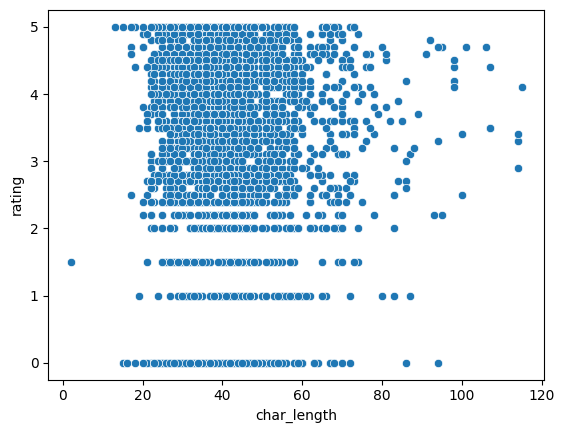

In [1353]:
sns.scatterplot(merged, x = 'char_length', y = 'rating')
plt.show()

#### Question 4

In [1354]:
print(merged)

      product_id   brand  listing_price  sale_price  discount  revenue  \
1         G27341  Adidas          75.99       37.99       0.5  1641.17   
2         CM0081  Adidas           9.99        5.99       0.4   398.93   
3         B44832  Adidas          69.99       34.99       0.5  2204.37   
4         D98205  Adidas          79.99       39.99       0.5  5182.70   
5         B75586  Adidas          47.99       19.20       0.6  1555.20   
...          ...     ...            ...         ...       ...      ...   
3174  AT6100-606    Nike           0.00       64.95       0.0     0.00   
3175  CT9155-063    Nike           0.00      139.95       0.0   251.91   
3176  CI1236-100    Nike         159.95      127.97       0.0   230.35   
3177  AH6799-300    Nike           0.00      169.95       0.0  1223.64   
3178  CJ9585-600    Nike          89.95       62.97       0.0     0.00   

                                           product_name  \
1                  Women's adidas Originals Sleek Sh

In [1355]:
merged['description_length'] = merged['description'].str.len()

print(merged.head(3))

  product_id   brand  listing_price  sale_price  discount  revenue  \
1     G27341  Adidas          75.99       37.99       0.5  1641.17   
2     CM0081  Adidas           9.99        5.99       0.4   398.93   
3     B44832  Adidas          69.99       34.99       0.5  2204.37   

                                       product_name  \
1              Women's adidas Originals Sleek Shoes   
2                 Women's adidas Swim Puka Slippers   
3  Women's adidas Sport Inspired Questar Ride Shoes   

                                         description  rating  reviews  \
1  A modern take on adidas sport heritage, tailor...     3.3     24.0   
2  These adidas Puka slippers for women's come wi...     2.6     37.0   
3  Inspired by modern tech runners, these women's...     4.1     35.0   

  price_label  char_length  description_length  
1   Expensive           29                 175  
2      Budget           28                 172  
3   Expensive           41                 264  


In [1356]:
merged['bin_length'] = pd.cut(merged['description_length'], bins = [0,100,200,300,400,500,600,700],labels = ["100", "200", "300", "400", "500", "600", "700"])

print(merged)

      product_id   brand  listing_price  sale_price  discount  revenue  \
1         G27341  Adidas          75.99       37.99       0.5  1641.17   
2         CM0081  Adidas           9.99        5.99       0.4   398.93   
3         B44832  Adidas          69.99       34.99       0.5  2204.37   
4         D98205  Adidas          79.99       39.99       0.5  5182.70   
5         B75586  Adidas          47.99       19.20       0.6  1555.20   
...          ...     ...            ...         ...       ...      ...   
3174  AT6100-606    Nike           0.00       64.95       0.0     0.00   
3175  CT9155-063    Nike           0.00      139.95       0.0   251.91   
3176  CI1236-100    Nike         159.95      127.97       0.0   230.35   
3177  AH6799-300    Nike           0.00      169.95       0.0  1223.64   
3178  CJ9585-600    Nike          89.95       62.97       0.0     0.00   

                                           product_name  \
1                  Women's adidas Originals Sleek Sh

In [1357]:
description_lengths = merged.groupby('bin_length', as_index=False).agg(mean_rating=('rating', 'mean'), total_reviews=('reviews', 'sum'))

description_lengths = description_lengths.round(2)

description_lengths = description_lengths.rename(columns={'bin_length': 'description_length'})

print(description_lengths)


  description_length  mean_rating  total_reviews
0                100         2.26           36.0
1                200         3.19        17719.0
2                300         3.28        76115.0
3                400         3.29        28994.0
4                500         3.35         4984.0
5                600         3.12          852.0
6                700         3.65          818.0


/var/folders/ph/td7f8msd4md23pppxr8dfz_c0000gn/T/ipykernel_26023/202790760.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  description_lengths = merged.groupby('bin_length', as_index=False).agg(mean_rating=('rating', 'mean'), total_reviews=('reviews', 'sum'))
